### Using Dataframes in Python

In [7]:
import os
from azureml.core import Workspace, Dataset
from azureml.core.authentication import ServicePrincipalAuthentication


service_principal = ServicePrincipalAuthentication(
    tenant_id="502f2f1d-000c-410d-9d65-de9b3cfa9a83",
    service_principal_id="5203e379-a33a-4aea-bd8d-20bef410cc72",
    service_principal_password="9~by7nEl35Zv-3lntYqwm7b-15~ulIWHmw")


ws = Workspace(
    subscription_id='f9f80119-dbb0-496f-8e2c-351e0b95b66e',
    resource_group='bupa_demo',
    workspace_name='bupa_demo',
    auth=service_principal)

print("Found workspace {} at location {}".format(ws.name, ws.location))

Found workspace bupa_demo at location australiaeast


In [8]:
import pandas as pd
dataset = Dataset.get_by_name(ws, name='car_and_health_insurance_cross_sell')

pdf = dataset.to_pandas_dataframe()

pdf.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Claims_Amount,Claims_Num
0,1,Male,44,1,28.0,0,> 2 Years,Yes,2753.018174,26.0,217,1,311,17
1,2,Male,76,1,3.0,0,1-2 Year,No,2282.227159,26.0,183,0,48,2
2,3,Male,47,1,28.0,0,> 2 Years,Yes,2606.023581,26.0,27,1,507,33
3,4,Male,21,1,11.0,1,< 1 Year,No,1947.610301,152.0,203,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,1871.186724,152.0,39,0,435,9


#### Pandas and matplotlib

Text(0, 0.5, '')

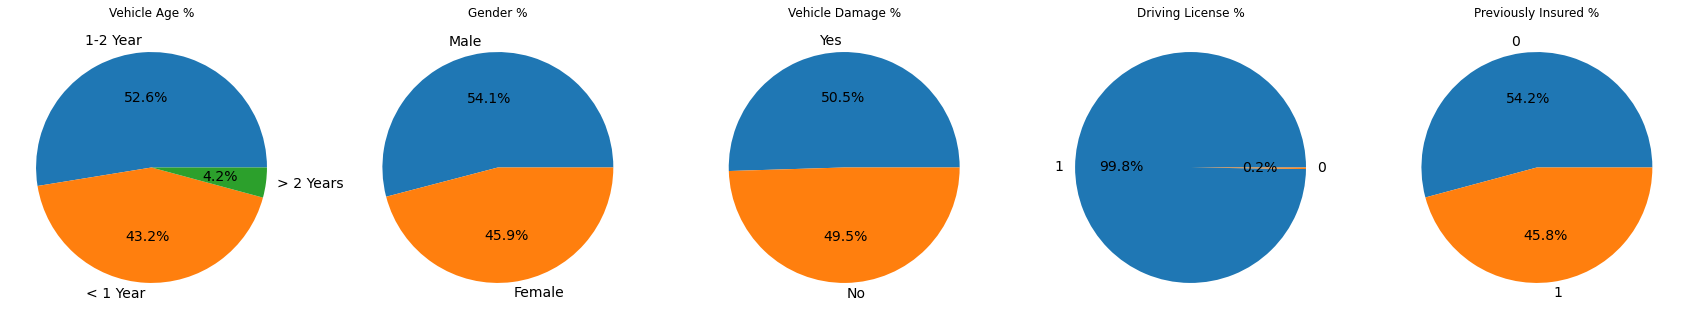

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# pdf = df.toPandas()

import warnings
warnings.filterwarnings('ignore')

plt.subplot(1, 5, 1)
v_age_counts = pdf['Vehicle_Age'].value_counts()
ax = v_age_counts.plot.pie(autopct = '%1.1f%%',figsize = (30,17), title = "Vehicle Age %", textprops={'fontsize': 14})
ax.yaxis.set_label_text('')

plt.subplot(1, 5, 2)
gender_counts = pdf['Gender'].value_counts()
ax = gender_counts.plot.pie(autopct = '%1.1f%%',figsize = (30,17), title = "Gender %", textprops={'fontsize': 14})
ax.yaxis.set_label_text('')

plt.subplot(1, 5, 3)
v_damage_counts = pdf['Vehicle_Damage'].value_counts()
ax = v_damage_counts.plot.pie(autopct = '%1.1f%%',figsize = (30,17),  title = "Vehicle Damage %", textprops={'fontsize': 14})
ax.yaxis.set_label_text('')

plt.subplot(1, 5, 4)
dl_counts = pdf['Driving_License'].value_counts()
ax = dl_counts.plot.pie(autopct = '%1.1f%%',figsize = (30,17),  title = "Driving License %", textprops={'fontsize': 14})
ax.yaxis.set_label_text('')

plt.subplot(1, 5, 5)
dl_counts = pdf['Previously_Insured'].value_counts()
ax = dl_counts.plot.pie(autopct = '%1.1f%%',figsize = (30,17),  title = "Previously Insured %", textprops={'fontsize': 14})
ax.yaxis.set_label_text('')
